## Observations and Insights 

The correlation between mouse weight and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.

From the selected treatments Capomulin and Ramicane reduces the size of tumors better.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')

# Display the data table for preview
mouse_study_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = mouse_study_merged["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_merged.loc[mouse_study_merged.duplicated(subset=["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_nodup = mouse_study_merged.loc[mouse_study_merged["Mouse ID"]!="g989"]
mouse_study_nodup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_study_mindup = mouse_study_nodup["Mouse ID"].nunique()
mouse_study_mindup

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_study_mean = mouse_study_nodup.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mouse_study_mean

mouse_study_median = mouse_study_nodup.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mouse_study_median

mouse_study_var = mouse_study_nodup.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mouse_study_var

mouse_study_std = mouse_study_nodup.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mouse_study_std

mouse_study_sem = mouse_study_nodup.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
mouse_study_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = pd.DataFrame({"Mean": mouse_study_mean, "Median": mouse_study_median, "Variance": mouse_study_var, "Standard Deviation": mouse_study_std, "SEM": mouse_study_sem})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_group_by = mouse_study_nodup.groupby('Drug Regimen')
summary_table_two = mouse_study_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_table_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# I did four bar graphs because the instructions in the rubric didn't match the notebook instructions
# So I did two for each set of instructions.

mouse_study_total_measurements = mouse_study_nodup.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
mouse_study_total_measurements

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

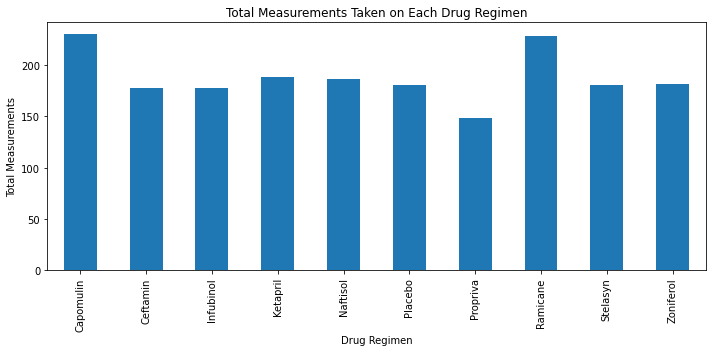

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_study_total_measurements.plot(kind="bar", figsize=(10,5))

plt.title("Total Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total Measurements')

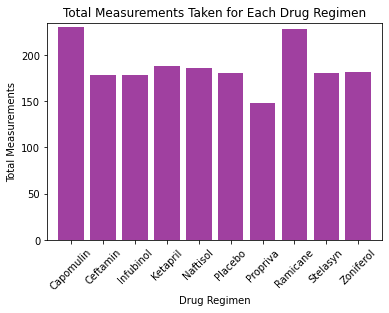

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
tumor_measurements = [230,178,178,188,186,181,148,228,181,182]

x_axis = np.arange(len(mouse_study_total_measurements))

plt.bar(x_axis, tumor_measurements, color='purple', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation=45)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(tumor_measurements)+5)

plt.title("Total Measurements Taken for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")

In [12]:
mouse_study_total_unique = mouse_study_nodup.groupby("Drug Regimen").nunique()["Mouse ID"]
mouse_study_total_unique

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

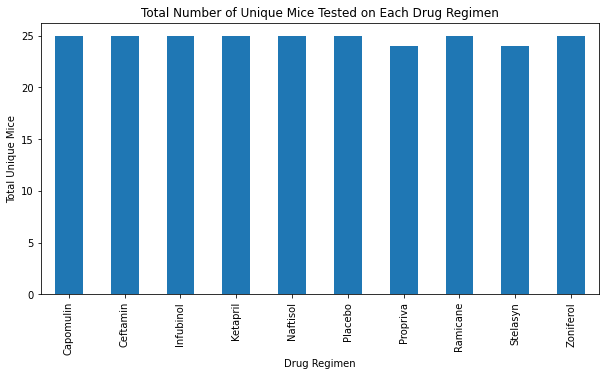

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar chart depicting the number of unique mice for each treatement regimen.
mouse_study_total_unique.plot(kind="bar", figsize=(10,5))

plt.title("Total Number of Unique Mice Tested on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Unique Mice")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Total Unique Mice')

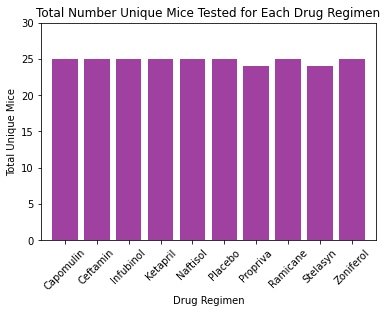

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_study = [25,25,25,25,25,25,24,25,24,25]

x_axis = np.arange(len(mouse_study_total_unique))

plt.bar(x_axis, drug_study, color='purple', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation=45)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_study)+5)

plt.title("Total Number Unique Mice Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Unique Mice")

In [15]:
plt.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [16]:
groupby_gender = mouse_study_merged.groupby(["Mouse ID", "Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


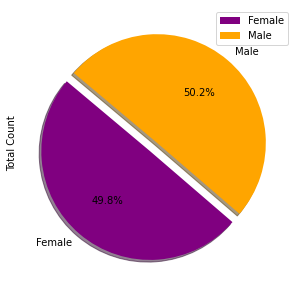

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['purple', 'orange']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

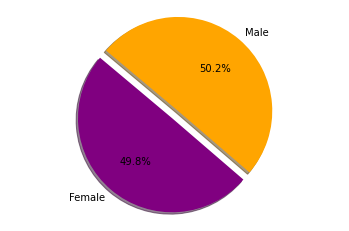

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels = ["Female", "Male"]

sizes = [49.799197,50.200803]

colors = ['purple', 'orange']

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mouse_study_timepoint = mouse_study_merged.groupby("Mouse ID")["Timepoint"].max()
mouse_study_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_study_timepoint_merge = pd.merge(mouse_study_merged, mouse_study_timepoint, on=["Mouse ID", "Timepoint"])
mouse_study_timepoint_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)

top_drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_drug_regimens

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in top_drug_regimens:
    print(regimen)
    capomulin_df = mouse_study_timepoint_merge.loc[mouse_study_timepoint_merge["Drug Regimen"] == regimen]
    quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    upper_bound = upperq+(iqr*1.5)
    lower_bound = lowerq-(iqr*1.5)

    outliers = capomulin_df.loc[(capomulin_df["Tumor Volume (mm3)"] > upper_bound) | (capomulin_df["Tumor Volume (mm3)"] < lower_bound), "Tumor Volume (mm3)"]
    print(f"The lower quartile of tumor size is:  {lowerq}")
    print(f"The upper quartile of tumor size is:  {upperq}")
    print(f"The interquartile range of tumor size is:  {iqr}")
    print(f"The median of tumor size is:  {quartiles[0.5]}")
    print("---------------------")
    print(f"Outliers are:  {outliers}")
    print()

Capomulin
The lower quartile of tumor size is:  32.37735684
The upper quartile of tumor size is:  40.1592203
The interquartile range of tumor size is:  7.781863460000004
The median of tumor size is:  38.125164399999996
---------------------
Outliers are:  Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane
The lower quartile of tumor size is:  31.56046955
The upper quartile of tumor size is:  40.65900627
The interquartile range of tumor size is:  9.098536719999998
The median of tumor size is:  36.56165229
---------------------
Outliers are:  Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol
The lower quartile of tumor size is:  54.04860769
The upper quartile of tumor size is:  65.52574285
The interquartile range of tumor size is:  11.477135160000003
The median of tumor size is:  60.16518046
---------------------
Outliers are:  74    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin
The lower quartile of tumor size is:  48.72207785
The upper quartile 

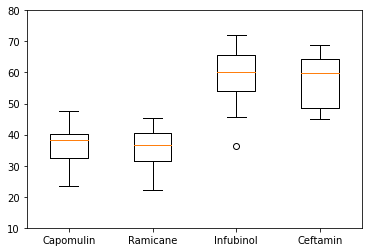

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot_df = mouse_study_timepoint_merge.reset_index()
tumor_lists = boxplot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_drug_regimens)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_drug_regimens)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

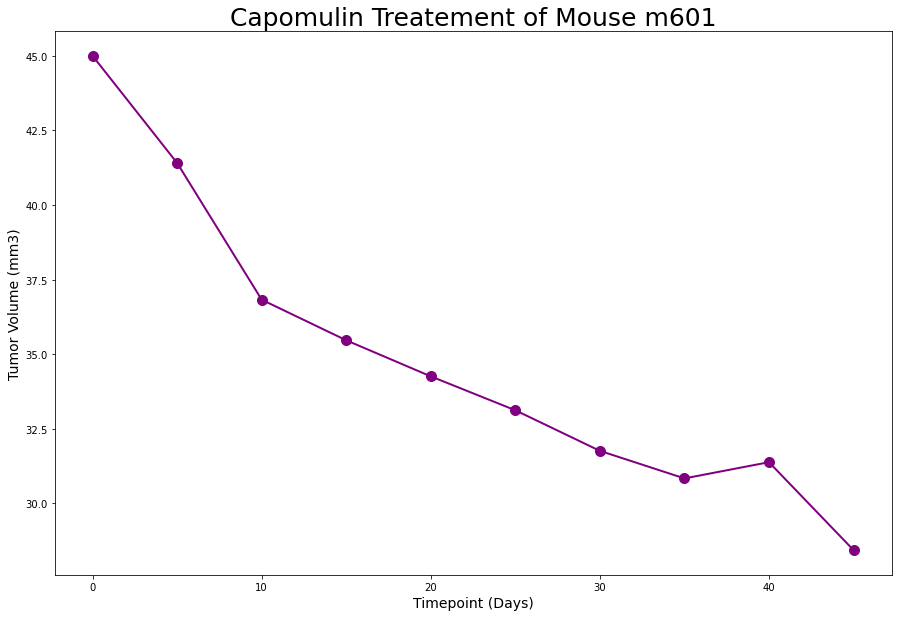

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = mouse_study_nodup.loc[mouse_study_nodup["Drug Regimen"] == "Capomulin"]
time_vs_tumor = mouse_study_nodup[mouse_study_nodup["Mouse ID"].isin(["m601"])]
time_vs_tumor

x_axis = time_vs_tumor["Timepoint"]
tumorsize = time_vs_tumor["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15,10))
plt.title("Capomulin Treatement of Mouse m601",fontsize=25)
plt.plot(x_axis, tumorsize,linewidth=2, markersize=10,marker="o",color="purple", label="Fahreneit")
plt.xlabel("Timepoint (Days)",fontsize=14)
plt.ylabel("Tumor Volume (mm3)",fontsize=14)

plt.show()

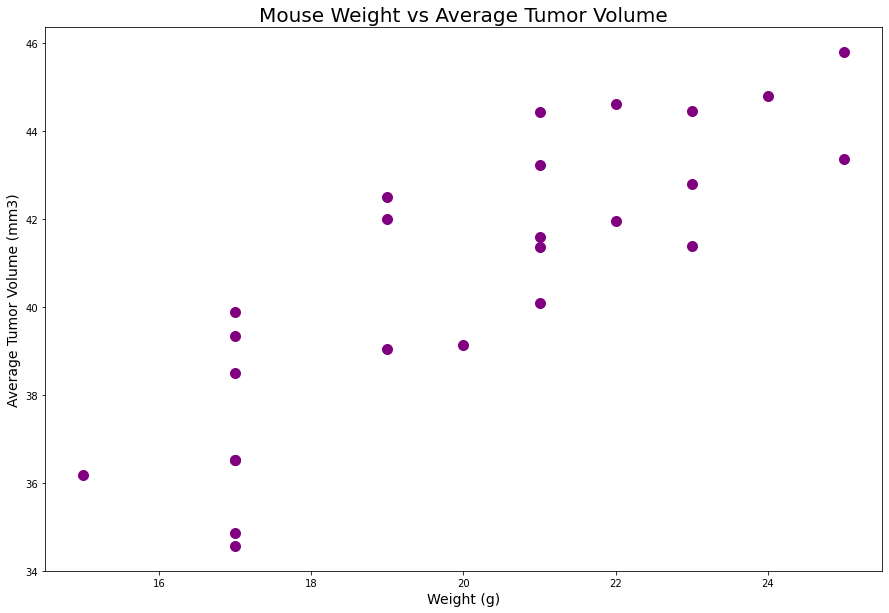

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capomulin = capomulin.groupby(['Mouse ID']).mean()
marker_size=10
plt.scatter(avg_capomulin['Weight (g)'],avg_capomulin['Tumor Volume (mm3)'],s=100, color="purple")
plt.title('Mouse Weight vs Average Tumor Volume',fontsize=20)
plt.xlabel('Weight (g)',fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=14)

plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [25]:
x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.12754359033201337
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


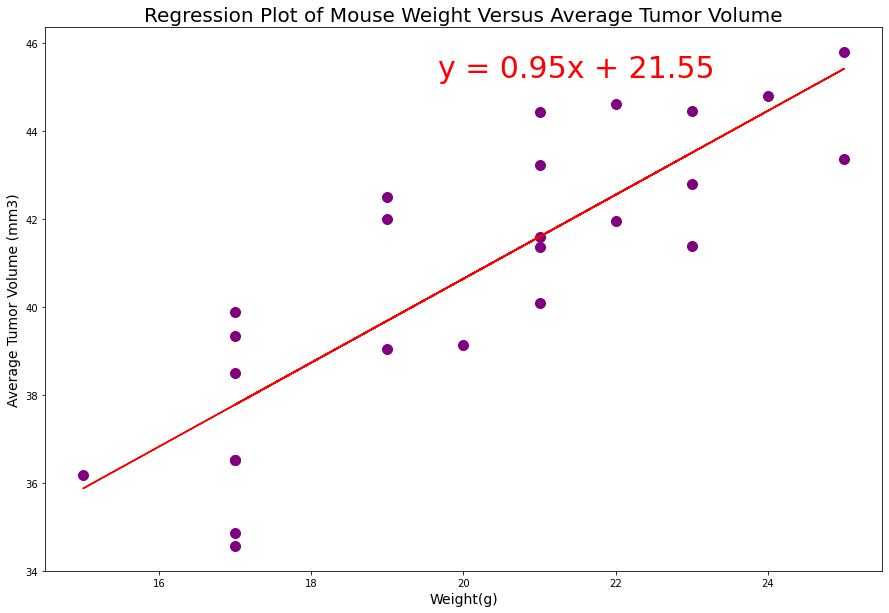

In [28]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=100, color="purple")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()